In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

auto=np.genfromtxt('new_car.csv',delimiter=',')
#Define sampling rate N
N = 200
auto1=auto[1:,1:]


auto1 = auto1.T
auto1.shape

from sklearn.decomposition import PCA
X=np.array(auto1)
pca=PCA(n_components=2)
pca.fit(X)
y = pca.fit_transform(X)
pc_auto = pca.components_
pc_auto.shape


auto1_mean = np.mean(auto1, axis = 1)  #Mean-center the data

data_mc = auto1 - np.transpose(np.tile(np.transpose(auto1_mean),(auto1.shape[1],1))) #Substract mean of each entry from the matrix to get mean-centered data 
data_mc_cov = np.cov(data_mc)

data_mc_eigvalue,data_mc_eigvector = np.linalg.eig(data_mc_cov) #Calculate the covariance matrix of the mean-centered data
data_mc_eigvalue_real = data_mc_eigvalue.real
data_mc_eigvector_real = data_mc_eigvector.real  #Omit the imaginary part of the eigenvalue/eigenvector




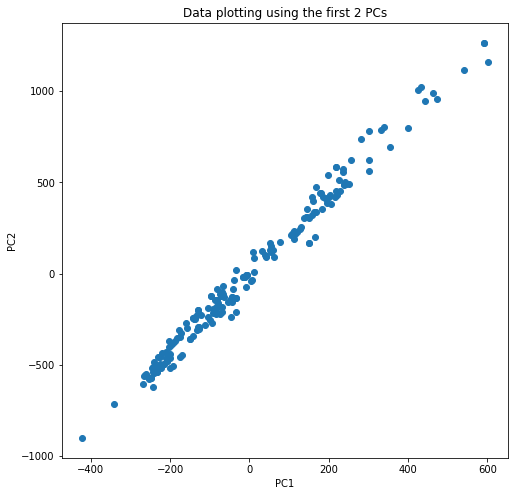

In [8]:

#Select the top eigenvectors as PCs, in this case, first 2 PCs

top_eigvec = data_mc_eigvector.real[0:2] #select top eigenvectors 
data_new = np.dot(data_mc.transpose(),top_eigvec.transpose())  #project the original data points to the new low-dimension space

#plot the data projected to the new eigenvector space. 
fig = plt.figure(figsize=(8,8))  
ax = fig.add_subplot(111)

ax.scatter(data_new[:, 0], data_new[:, 1], cmap= "coolwarm" ,marker='o')
plt.title("Data plotting using the first 2 PCs")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
 

In [9]:
print(pca.explained_variance_ratio_) 

[0.98899554 0.01095733]


In [10]:
top_eigvec

array([[ 8.08118029e-03, -3.56726786e-03,  6.15038478e-02,
         7.35840327e-02,  3.62872908e-01,  1.29962775e-01,
         3.89829366e-01, -7.66735014e-01,  2.57367152e-01,
         1.19259919e-01,  1.39736355e-01,  4.65440184e-02,
        -1.24303641e-02,  4.03378691e-04],
       [ 1.71902275e-02, -1.13828471e-02,  6.85026184e-02,
         1.61036984e-02,  8.51999441e-01,  2.87188564e-01,
        -1.94205050e-01,  3.74122263e-01,  4.17411108e-02,
        -6.32892789e-02,  5.21934056e-02,  2.44317070e-03,
         8.92302343e-03, -1.41686223e-03]])

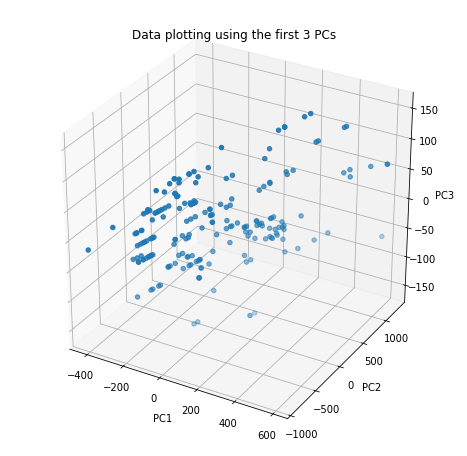

In [11]:

#Select the top eigenvectors as PCs, in this case, first 3 PCs

top_eigvec = data_mc_eigvector.real[0:3] #select top eigenvectors 
data_new = np.dot(data_mc.transpose(),top_eigvec.transpose())  #project the original data points to the new low-dimension space

#plot the data projected to the new eigenvector space. 
fig = plt.figure(figsize=(8,8))  
ax = fig.add_subplot(111,projection='3d')

ax.scatter(data_new[:, 0], data_new[:, 1], data_new[:, 2],cmap= "coolwarm" ,marker='o')
plt.title("Data plotting using the first 3 PCs")

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()
 

In [24]:
labels   = [] 

price = auto[:,0]
for i in range(N):
    if price[i]<10000:
        labels.append('A')
    if 10000<=price[i]<15000:
        labels.append('B')
    if 15000<=price[i]<20000:
        labels.append('C')
    if price[i]>=20000:
        labels.append('D')
          
# Label to color dict (manual)
label_color_dict = {'A':'red','B':'yellow','C':'blue','D':'green'}

# Color vector creation
cvec = [label_color_dict[label] for label in labels]

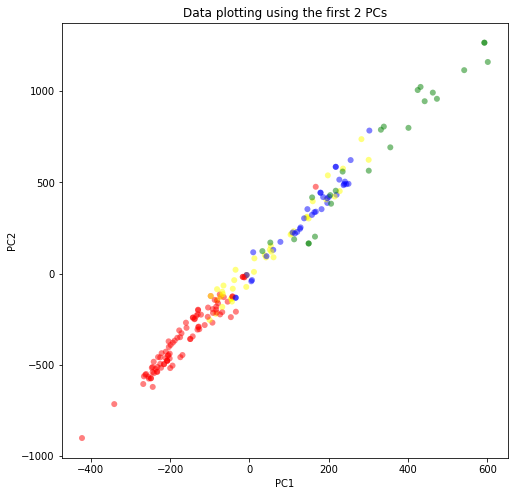

In [25]:
#Select the top eigenvectors as PCs, in this case, first 2 PCs

top_eigvec = data_mc_eigvector.real[0:2] #select top eigenvectors 
data_new = np.dot(data_mc.transpose(),top_eigvec.transpose())  #project the original data points to the new low-dimension space

#plot the data projected to the new eigenvector space. 
plt.figure(figsize=(8,8))  
plt.scatter(data_new[:, 0], data_new[:, 1], c=cvec, edgecolor='', alpha=0.5)


plt.title("Data plotting using the first 2 PCs")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
 